Name: **Luong Nguyen**  
Student ID: **1504210**  

# Introduction to Deep Learning 

## Session07: hyperparameter optimization (train optimized model)
____

In [0]:
# import packages
import numpy as np
from keras import models, layers
import matplotlib.pyplot as plt

## Data

In [12]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [0]:
# unroll image into a vector
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# scaling all values into [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# categorically encode the labels
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Optimized model

In [18]:
model = models.Sequential()
model.add(layers.Dense(512, input_shape=(784,), activation='relu')) # 'Dense': 2

model.add(layers.Dropout(0.5152808649614491)) # 'Dropout': 0.5152808649614491

model.add(layers.Dense(512, activation = 'relu')) # 'Dense_1': 2

model.add(layers.Dropout(0.42522861686845626)) # 'Dropout_1': 0.42522861686845626

# 'conditional': 0 => 'three'

model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer='rmsprop') # 'optimizer': 0

# 'batch_size': 1
hist = model.fit(x_train, y_train,
          batch_size=128, 
          epochs=20,
          verbose=2,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 9s - loss: 0.6297 - acc: 0.7719 - val_loss: 0.5017 - val_acc: 0.8244
Epoch 2/20
 - 9s - loss: 0.4626 - acc: 0.8337 - val_loss: 0.4171 - val_acc: 0.8480
Epoch 3/20
 - 9s - loss: 0.4334 - acc: 0.8464 - val_loss: 0.4087 - val_acc: 0.8573
Epoch 4/20
 - 9s - loss: 0.4178 - acc: 0.8531 - val_loss: 0.3815 - val_acc: 0.8703
Epoch 5/20
 - 9s - loss: 0.4089 - acc: 0.8584 - val_loss: 0.4044 - val_acc: 0.8612
Epoch 6/20
 - 9s - loss: 0.4027 - acc: 0.8603 - val_loss: 0.4018 - val_acc: 0.8627
Epoch 7/20
 - 8s - loss: 0.3975 - acc: 0.8630 - val_loss: 0.3864 - val_acc: 0.8643
Epoch 8/20
 - 9s - loss: 0.3966 - acc: 0.8663 - val_loss: 0.3988 - val_acc: 0.8635
Epoch 9/20
 - 9s - loss: 0.3961 - acc: 0.8667 - val_loss: 0.4153 - val_acc: 0.8637
Epoch 10/20
 - 9s - loss: 0.3912 - acc: 0.8691 - val_loss: 0.4009 - val_acc: 0.8707
Epoch 11/20
 - 9s - loss: 0.3865 - acc: 0.8697 - val_loss: 0.4236 - val_acc: 0.8535
Epoch 12/20
 - 9s - loss: 0.3865 - 

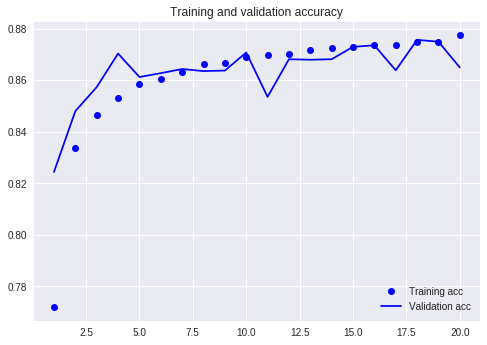

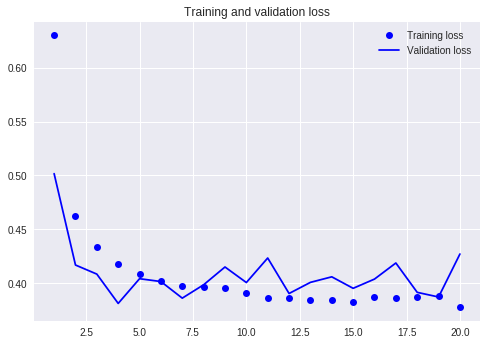

In [19]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()